In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from IPython.display import display, clear_output
from math import floor, ceil
import random as rd
import pandas as pd
import math

## Sqaure Grid Scatter Plots


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from IPython.display import display, clear_output
from math import floor, ceil
import random as rd
import pandas as pd
import math

def without(d, key):
    new_d = d.copy()
    new_d.pop(key)
    return new_d

class Sandpile():
    def __init__(self, max_sand = 4, edge=(False, 0)):
        self.max_grains = max_sand
        self.grid = {}
        self.edge = edge

    def topple(self, key, edge):
        x, y = key
        p = self.grid[key]
        b = p // self.max_grains
        o = p % self.max_grains
        self.grid[key] = o

        # increase height of neighbor piles
        try:      
            self.grid[(x+1, y)] += b
        except:
            self.grid[(x+1, y)] = b
        try:      
            self.grid[(x-1, y)] += b
        except:
            self.grid[(x-1, y)] = b
        try:      
            self.grid[(x, y+1)] += b
        except:
            self.grid[(x, y+1)] = b
        try:      
            self.grid[(x, y-1)] += b
        except:
            self.grid[(x, y-1)] = b

        if edge[0]:
            self.grid = {key1: self.grid[key1] for key1 in self.grid if (abs(key1[0])<edge[1] and abs(key1[1])<edge[1])}

    def run(self):
        square_list = []
        while max(self.grid.values()) >= self.max_grains:
            for i in self.grid.items():
                if i[1] == max(self.grid.values()):
                    location = i[0]
                    break
            self.topple(location, self.edge)
            if not (location in square_list):
                square_list.append(location)
        square = len(square_list)
        # calulate perimeter of square
        bound_list = []
        for key in square_list:
            neighbor_count = 0
            for k in square_list:
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1):
                    neighbor_count += 1
            if neighbor_count < 4:
                bound_list.append(key)
        perimeter = len(bound_list)

        return square, perimeter

            
    def display_run(self):
        #start_time = time()
        iterations = 0

        while max(self.grid.values()) >= self.max_grains:
            for i in self.grid.items():
                if i[1] == max(self.grid.values()):
                    location = i[0]
                    break
            self.topple(location)
            iterations += 1
        #print("--- %d iterations %s seconds ---" % (iterations, time() - start_time))
        
    def set_pile(self, grid):
        self.grid = grid

    def get_pile(self):
        return self.grid

    def set_sand(self, x, y, number):
        self.grid[(x,y)] = number

    def add_sand(self, x, y, number):
        self.grid[(x,y)] += number
        
    def __add__(self, other):
        result = Sandpile(rows = self.rows, cols = self.cols)
        try:
            result.grid = self.grid + other.grid
            return result.run()
        except ValueError:
            print("ValueError: sandpile grid sizes must match")

    def show(self, dotsize=50, minheight=0, cmap='viridis', threeD=False):
        xvalues = []
        yvalues = []
        heights = []
        fig = plt.figure()
        for key in self.grid:
            if self.grid[key] >= minheight:
                x, y = key
                xvalues.append(x)
                yvalues.append(y)
                heights.append(self.grid[key]) 
        if threeD:
            fig = plt.figure()
            ax = fig.add_subplot(projection='3d')
            ax.scatter(xvalues, yvalues, heights)
            ax.set_zlabel('Z Label')
            plt.show()
        else: 
            plt.scatter(xvalues, yvalues, c=heights, cmap=cmap, vmin=0, vmax=self.max_grains-1, s=dotsize)
            plt.colorbar()   
            plt.xlim([-20,20])
            plt.ylim([-20,20])
        return fig
        
    def animate_drops(self, drops, dotsize=50):
        import time
        fig = plt.figure(figsize=(11,9))
        for i in range(drops):
            self.set_sand(0, 0, 6)
            self.run()
            self.show(dotsize)
            time.sleep(.05)   
            clear_output(wait=True)
            display(fig)
            fig.clear()
            
    def animate_wave(self, show=True, dotsize=50):
        import time
        iterations = 0
        if show:
            fig = plt.figure(figsize=(11,9))
        if self.grid[(0,0)]>5:
            self.topple((0,0))
            iterations += 1
        else:
            return(0)
        center = self.grid[(0,0)]
        
        while max(without(self.grid, (0,0)).values()) >= self.max_grains:
            for i in without(self.grid, (0,0)).items():
                if i[1] == max(without(self.grid, (0,0)).values()):
                    location = i[0]
                    break
            self.topple(location)
            if show:
                self.show(dotsize)
    #             time.sleep(.05)   
                clear_output(wait=True)
                display(fig)
                fig.clear()
            iterations += 1
        return iterations
    
    def boundry(self, plot=False):
        # Find boundry points
        bound_list = []
        for key in self.grid:
            neighbor_count = 0
            for k in without(self.grid, key):
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1):
                    neighbor_count += 1
            if neighbor_count < 4:
                bound_list.append(key)
        
        if plot:
            # Plot points
            x = [bound_list[i][0] for i in range(len(bound_list))]
            y = [bound_list[j][1] for j in range(len(bound_list))]
            plt.scatter(x, y, s=2, c='red', marker='s')


            # Sort in order
            angle_list = []
            for point in bound_list:
                x, y = point
                if x >= 0:
                    try:
                        angle_list.append(math.atan(y/x))
                    except:
                        if y>0:
                            angle_list.append(np.pi/2)
                        else:
                            angle_list.append(-np.pi/2)
                else:
                    angle_list.append(math.atan(y/x) + np.pi)
            bound_arr = np.array(bound_list)
            angle_arr = np.array(angle_list)
            inds = angle_arr.argsort()
            sorted_bound = bound_arr[inds]

            # Plot line
            x = [sorted_bound[i][0] for i in range(len(sorted_bound))]
            y = [sorted_bound[j][1] for j in range(len(sorted_bound))]
            plt.plot(x, y, c='red')
            plt.plot([x[-1], x[0]], [y[-1], y[0]], c='red')
            
        return bound_list
    
    def clear_levels(self, minheight):
        keys = []
        for key in self.grid:
            if self.grid[key] < minheight:
                keys.append(key)
        for k in keys:
            del self.grid[k]
                
    def get_ratios(self):
        counts = [0, 0, 0, 0]
        for v in self.grid.values():
            counts[v] += 1
        return np.array(counts)/len(self.grid)
    
    def get_density(self):
        vals = self.grid.values()
        return sum(vals)/len(vals)
    
    def get_boundry_density(self):
        locs = self.boundry(plot=False)
        vals = [self.grid[i] for i in locs]
        return sum(vals)/len(vals)

In [13]:
df = pd.DataFrame(columns=["Sand Amount", "Square", "Perimeter"])

In [17]:
# loop through all possible states
pile = Sandpile(max_sand=4, edge=(False, 9))
pile.set_sand(0, 0, 0)
for i in range(3000, 5000):
    pile.add_sand(0, 0, 1)
    s, p = pile.run()
    df.loc[len(df.index)] = [i, s, p]

In [18]:
df

,Sand Amount,Square,Perimeter
0,1,0,0
1,2,0,0
2,3,0,0
3,4,1,1
4,5,0,0
...,...,...,...
4994,4995,1,1
4995,4996,0,0
4996,4997,0,0
4997,4998,0,0


In [19]:
df.to_csv('1-4999_SquareGrid_SP_2')

In [2]:
df = pd.DataFrame(columns=["Sand Amount", "Density", "Boundry Density"])

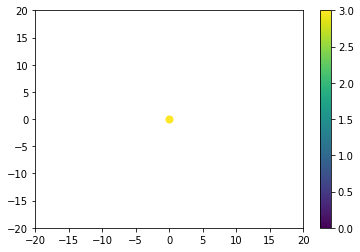

In [14]:
pilet = Sandpile(max_sand=4, edge=(False, 9))
pilet.set_sand(0, 0, 1)
piles = pilet
piles.set_sand(0, 0, 3)
pilet.show()

In [23]:
# loop through all possible states
pile = Sandpile(max_sand=4, edge=(False, 9))
pile.set_sand(0, 0, 1899)
pile.run()
for i in range(1900, 2200):
    pile.add_sand(0, 0, 1)
    pile.run()
    df.loc[len(df.index)] = [i, pile.get_density(), pile.get_boundry_density()]

In [22]:
df

,Sand Amount,Density,Boundry Density
0,1400.0,2.105263,1.800000
1,1401.0,2.106767,1.800000
2,1402.0,2.108271,1.800000
3,1403.0,2.109774,1.800000
4,1404.0,2.061674,1.800000
...,...,...,...
495,1895.0,2.075575,2.208333
496,1896.0,2.076670,2.208333
497,1897.0,2.077766,2.208333
498,1898.0,2.078861,2.208333


In [72]:
df.to_csv('1000-1400_Densities')

In [79]:
pd.read_csv('1000-1400_Densities', usecols=[1,2,3])

,Sand Amount,Density,Boundry Density
0,1000.0,2.044990,1.588235
1,1001.0,2.047035,1.588235
2,1002.0,2.049080,1.588235
3,1003.0,2.051125,1.588235
4,1004.0,2.053170,1.588235
...,...,...,...
395,1395.0,2.097744,1.800000
396,1396.0,2.099248,1.800000
397,1397.0,2.100752,1.800000
398,1398.0,2.102256,1.800000


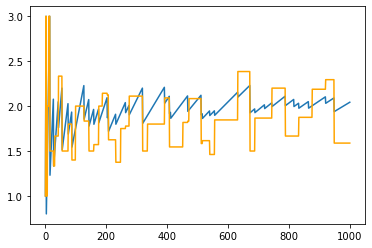

In [51]:
plt.plot(df.index, df['Density'])
plt.plot(df.index, df['Boundry Density'], c='orange')

1.9004524886877827 1.5454545454545454


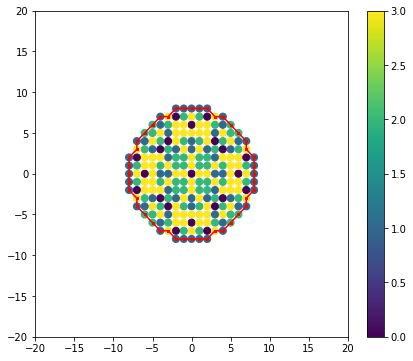

In [31]:
pile = Sandpile(max_sand=4, edge=(False, 9))
pile.set_sand(0, 0, 420)
pile.run()
fig = plt.figure(figsize=(7,6))
pile.show()
pile.boundry()
print(pile.get_density(), pile.get_boundry_density())

array([0.06735751, 0.16580311, 0.39378238, 0.37305699])

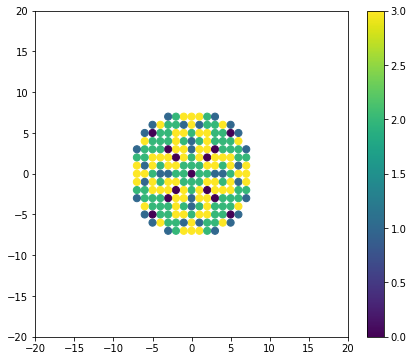

In [4]:
pile = Sandpile(max_sand=4, edge=(False, 9))
pile.set_sand(0, 0, 400)
pile.run()
fig = plt.figure(figsize=(7,6))
pile.show()
pile.get_ratios()

In [60]:
df = pd.DataFrame(columns=["Sand Amount", "0", "1", "2", "3"])

In [61]:
# random samples
for i in range(100):
    sand_amount = rd.randint(1000, 2000)
    pile = Sandpile(max_sand=4, edge=(False, 9))
    pile.set_sand(0, 0, sand_amount)
    pile.run()
    a, b, c, d = pile.get_ratios()
    df.loc[len(df.index)] = [sand_amount, a, b, c, d]

In [5]:
# loop through all possible states
for i in range(16, 1000):
    sand_amount = i
    pile = Sandpile(max_sand=4, edge=(False, 9))
    pile.set_sand(0, 0, sand_amount)
    pile.run()
    a, b, c, d = pile.get_ratios()
    df.loc[len(df.index)] = [sand_amount, a, b, c, d]

# Densities

In [53]:
den1 = pd.read_csv('1-1000_Densities')
den1

,Sand Amount,Density,Boundry Density
0,1.0,1.000000,1.000000
1,2.0,2.000000,2.000000
2,3.0,3.000000,3.000000
3,4.0,0.800000,1.000000
4,5.0,1.000000,1.000000
...,...,...,...
994,995.0,2.034765,1.588235
995,996.0,2.036810,1.588235
996,997.0,2.038855,1.588235
997,998.0,2.040900,1.588235


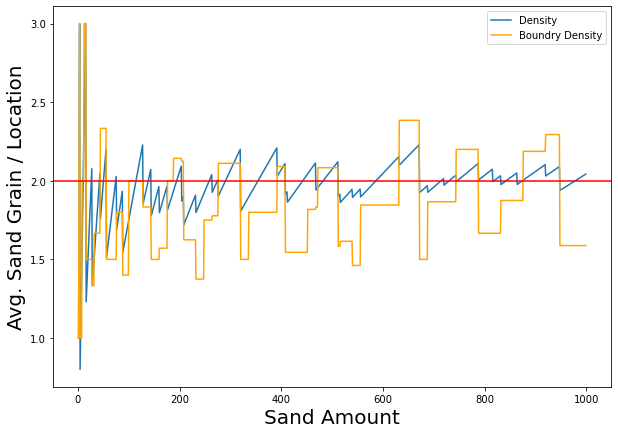

In [65]:
fig = plt.figure(figsize=(10,7))
plt.plot(den1['Sand Amount'], den1['Density'], label='Density')
plt.plot(den1['Sand Amount'], den1['Boundry Density'], c='orange', label='Boundry Density')
plt.xlabel('Sand Amount', size=20)
plt.ylabel('Avg. Sand Grain / Location', size=20)
plt.axhline(2, c='red')
plt.legend()
plt.show()

# Ratios

In [67]:
RDF = pd.read_csv('1k-2k:rand_Ratios.csv', usecols=[1, 2, 3, 4, 5])
RDF

,Sand Amount,0,1,2,3
0,1003.0,0.057260,0.229039,0.319018,0.394683
1,1004.0,0.059305,0.229039,0.310838,0.400818
2,1036.0,0.079304,0.239845,0.278530,0.402321
3,1041.0,0.061896,0.257253,0.286267,0.394584
4,1054.0,0.069632,0.239845,0.272727,0.417795
...,...,...,...,...,...
95,1970.0,0.075869,0.189673,0.317176,0.417281
96,1973.0,0.075869,0.190727,0.311907,0.421496
97,1978.0,0.086331,0.209661,0.288798,0.415211
98,1988.0,0.095581,0.209661,0.250771,0.443988


In [11]:
DF = pd.read_csv('1000_Ratios.csv', usecols=[1, 2, 3, 4, 5])
DF

,Sand Amount,0,1,2,3
0,16.0,0.076923,0.615385,0.307692,0.000000
1,17.0,0.000000,0.692308,0.307692,0.000000
2,18.0,0.000000,0.615385,0.384615,0.000000
3,19.0,0.000000,0.615385,0.307692,0.076923
4,20.0,0.076923,0.307692,0.615385,0.000000
...,...,...,...,...,...
979,995.0,0.065440,0.237219,0.294479,0.402863
980,996.0,0.059305,0.237219,0.310838,0.392638
981,997.0,0.057260,0.239264,0.310838,0.392638
982,998.0,0.057260,0.237219,0.312883,0.392638


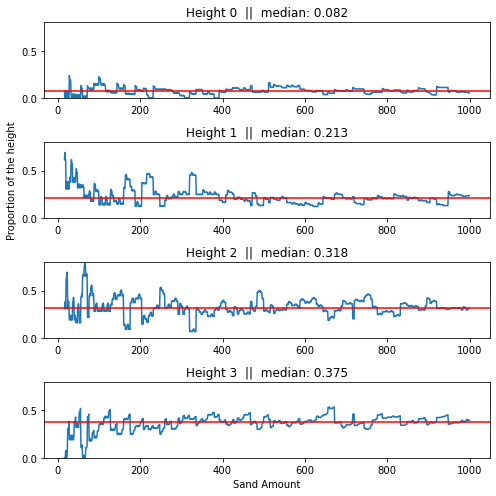

In [56]:
plt.figure(figsize=(7,7))

plt.subplot(411)
plt.plot(DF['Sand Amount'], DF['0'])
plt.ylim([0,.8])
plt.axhline(np.median(DF['0']), color='red')
plt.title('Height 0  ||  median: '+ str(np.round(np.median(DF['0']), 3)))

plt.subplot(412)
plt.plot(DF['Sand Amount'], DF['1'])
plt.ylabel("Proportion of the height")
plt.ylim([0,.8])
plt.axhline(np.median(DF['1']), color='red')
plt.title('Height 1  ||  median: '+ str(np.round(np.median(DF['1']), 3)))

plt.subplot(413)
plt.plot(DF['Sand Amount'], DF['2'])
plt.ylim([0,.8])
plt.axhline(np.median(DF['2']), color='red')
plt.title('Height 2  ||  median: '+ str(np.round(np.median(DF['2']), 3)))

plt.subplot(414)
plt.plot(DF['Sand Amount'], DF['3'])
plt.xlabel("Sand Amount")
plt.ylim([0,.8])
plt.axhline(np.median(DF['3']), color='red')
plt.title('Height 3  ||  median: '+ str(np.round(np.median(DF['3']), 3)))

plt.tight_layout()
plt.show()

<BarContainer object of 4 artists>

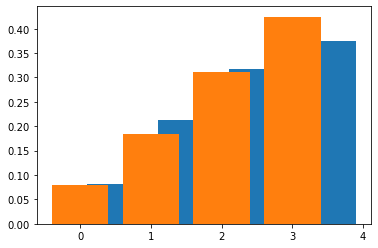

In [72]:
plt.bar([0.5, 1.5, 2.5, 3.5], [np.median(DF['0']), np.median(DF['1']), np.median(DF['2']), np.median(DF['3'])])
plt.bar([0, 1, 2, 3], [np.median(RDF['0']), np.median(RDF['1']), np.median(RDF['2']), np.median(RDF['3'])])

if w and r are opposite signs, sum coeffients
if w and r are same sign, take maximum 

Square grid
sum abs of coords

lim n->1/6  d1 +2*d2 + 3*d3
Prove experimentally that this diverges?
Can we give an average or guess?

## Triangluar Grid Sandpiles

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from IPython.display import display, clear_output
from math import floor, ceil
import random as rd
import pandas as pd
import math

def without(d, key):
    new_d = d.copy()
    new_d.pop(key)
    return new_d

class TriSandpile():
    def __init__(self, max_sand = 6, edge=(False, 0)):
        self.max_grains = max_sand
        self.grid = {}
        self.edge = edge

    def topple(self, key, edge):
        x, w = key
        p = self.grid[key]
        b = p // self.max_grains
        o = p % self.max_grains
        self.grid[key] = o

        # increase height of neighbor piles
        try:      
            self.grid[(x+1, w)] += b
        except:
            self.grid[(x+1, w)] = b
        try:      
            self.grid[(x-1, w)] += b
        except:
            self.grid[(x-1, w)] = b
        try:      
            self.grid[(x+1, w+1)] += b
        except:
            self.grid[(x+1, w+1)] = b
        try:      
            self.grid[(x-1, w-1)] += b
        except:
            self.grid[(x-1, w-1)] = b
        try:      
            self.grid[(x, w+1)] += b
        except:
            self.grid[(x, w+1)] = b
        try:      
            self.grid[(x, w-1)] += b
        except:
            self.grid[(x, w-1)] = b

        if edge[0]:
            self.grid = {key1: self.grid[key1] for key1 in self.grid if (abs(key1[0])+abs(key1[1]))<edge[1]}


    def run(self):
        square_list = []
        while max(self.grid.values()) >= self.max_grains:
            for i in self.grid.items():
                if i[1] == max(self.grid.values()):
                    location = i[0]
                    break
            self.topple(location, self.edge)
            if not (location in square_list):
                square_list.append(location)
        square = len(square_list)
        bound_list = []
        for key in square_list:
            neighbor_count = 0
            for k in square_list:
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1) or (k[0] - key[0] == 1 and k[1] - key[1] == 1) or (k[0] - key[0] == -1 and k[1] - key[1] == -1):
                    neighbor_count += 1
            if neighbor_count < 6:
                bound_list.append(key)
        perimeter = len(bound_list)
        return square, perimeter

    def get_pile(self):
        return self.grid

    def set_sand(self, x, w, number):
        self.grid[(x,w)] = number
        
    def add_sand(self, x, y, number):
        self.grid[(x,y)] += number
        
    def __add__(self, other):
        result = Sandpile(rows = self.rows, cols = self.cols)
        try:
            result.grid = self.grid + other.grid
            return result.run()
        except ValueError:
            print("ValueError: sandpile grid sizes must match")

    def show(self, dotsize=50, minheight=0):
        xvalues = []
        yvalues = []
        heights = []
        fig = plt.figure()
        for key in self.grid:
            if self.grid[key] >= minheight:
                r, w = key
                xvalues.append(r-w*np.cos(np.pi/3))
                yvalues.append(w*np.sin(np.pi/3))
                heights.append(self.grid[key]) 
        else: 
            plt.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=self.max_grains-1, s=dotsize)
            plt.colorbar()   
            plt.xlim([-20,20])
            plt.ylim([-20,20])
            return fig
        
    def animate_drops(self, drops, dotsize=50):
        import time
        fig = plt.figure(figsize=(11,9))
        for i in range(drops):
            self.set_sand(0, 0, 6)
            self.run()
            self.show(dotsize)
            time.sleep(.05)   
            clear_output(wait=True)
            display(fig)
            fig.clear()
            
    def animate_wave(self, show=True, dotsize=50):
        import time
        iterations = 0
        if show:
            fig = plt.figure(figsize=(11,9))
        if self.grid[(0,0)]>5:
            self.topple((0,0))
            iterations += 1
        else:
            return(0)
        center = self.grid[(0,0)]
        
        while max(without(self.grid, (0,0)).values()) >= self.max_grains:
            for i in without(self.grid, (0,0)).items():
                if i[1] == max(without(self.grid, (0,0)).values()):
                    location = i[0]
                    break
            self.topple(location)
            if show:
                self.show(dotsize)
    #             time.sleep(.05)   
                clear_output(wait=True)
                display(fig)
                fig.clear()
            iterations += 1
        return iterations
    
    def boundry(self, plot=True):
        # Find boundry points
        bound_list = []
        for key in self.grid:
            neighbor_count = 0
            for k in without(self.grid, key):
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1) or (k[0] - key[0] == 1 and k[1] - key[1] == 1) or (k[0] - key[0] == -1 and k[1] - key[1] == -1):
                    neighbor_count += 1
            if neighbor_count < 6:
                bound_list.append(key)
        
        if plot:
            # Plot points
            x = [bound_list[i][0]-bound_list[i][1]*np.cos(np.pi/3) for i in range(len(bound_list))]
            y = [bound_list[j][1]*np.sin(np.pi/3) for j in range(len(bound_list))]
            plt.scatter(x, y, s=2, c='red', marker='s')


            # Sort in order
            angle_list = []
            for point in bound_list:
                x, y = point[0]-point[1]*np.cos(np.pi/3), point[1]*np.sin(np.pi/3)
                if x >= 0:
                    try:
                        angle_list.append(math.atan(y/x))
                    except:
                        if y>0:
                            angle_list.append(np.pi/2)
                        else:
                            angle_list.append(-np.pi/2)
                else:
                    angle_list.append(math.atan(y/x) + np.pi)
            bound_arr = np.array([(bound_list[i][0]-bound_list[i][1]*np.cos(np.pi/3),bound_list[i][1]*np.sin(np.pi/3)) for i in range(len(bound_list))])
            angle_arr = np.array(angle_list)
            inds = angle_arr.argsort()
            sorted_bound = bound_arr[inds]

            # Plot line
            x = [sorted_bound[i][0] for i in range(len(sorted_bound))]
            y = [sorted_bound[j][1] for j in range(len(sorted_bound))]
            plt.plot(x, y, c='red')
            plt.plot([x[-1], x[0]], [y[-1], y[0]], c='red')
            
        return bound_list
    
    def get_ratios(self):
        counts = [0, 0, 0, 0, 0, 0]
        for v in self.grid.values():
            counts[v] += 1
        return np.array(counts)/len(self.grid)
    
    def get_density(self):
        vals = self.grid.values()
        return sum(vals)/len(vals)
    
    def get_boundry_density(self):
        locs = self.boundry(plot=False)
        vals = [self.grid[i] for i in locs]
        return sum(vals)/len(vals)

In [35]:
df = pd.DataFrame(columns=["Sand Amount", "Square", "Perimeter"])

In [36]:
# loop through all possible states
pile = TriSandpile(max_sand=6, edge=(False, 9))
pile.set_sand(0, 0, 0)
for i in range(1, 8000):
    pile.add_sand(0, 0, 1)
    s, p = pile.run()
    df.loc[len(df.index)] = [i, s, p]

KeyboardInterrupt: 

In [42]:
df.to_csv('1-7492_HexGrid_SP_2')

In [29]:
pile = TriSandpile()
fig = plt.figure(figsize=(8,7))
pile.set_sand(0, 0, 600)
pile.run()
print(pile.get_density())
pile.get_boundry_density()


3.0150753768844223


2.375

<Figure size 576x504 with 0 Axes>

In [33]:
df = pd.DataFrame(columns=["Sand Amount", "Density", "Boundry Density"])

In [34]:
# loop through all possible states
pile = TriSandpile()
pile.set_sand(0, 0, 1)
for i in range(1, 2200):
    pile.run()
    df.loc[len(df.index)] = [i, pile.get_density(), pile.get_boundry_density()]
    pile.add_sand(0, 0, 1)

In [37]:
df.to_csv('1-2199_Densities_Tri', index=False)

In [23]:
pile = TriSandpile(max_sand=6)
pile.set_sand(0, 0, 100)
pile.animate_wave(dotsize=70)

NameError: name 'without' is not defined

<Figure size 792x648 with 0 Axes>

In [22]:
pile.animate_wave(dotsize=70)

0

<Figure size 792x648 with 0 Axes>

In [78]:
pile = TriSandpile(max_sand=6)
pile.set_sand(0, 0, 1000)
sizes = []
for i in range(10):
    sizes.append(pile.animate_wave(show=False, dotsize=70))
print(sizes)

[1238, 1200, 1259, 548, 66, 7, 1, 0, 0, 0]


Text(0.5, 1.0, 'Waves of 2000 pile')

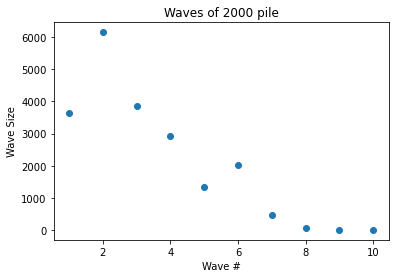

In [51]:
plt.scatter(x=np.arange(1,len(sizes)+1), y=sizes)
plt.xlabel("Wave #")
plt.ylabel("Wave Size")
plt.title("Waves of 2000 pile")

In [62]:
sims = []
for j in range(1,7):
    pile = TriSandpile(max_sand=6)
    pile.set_sand(0, 0, 100*j+500)
    sizes = []
    for i in range(10):
        sizes.append(pile.animate_wave(show=False, dotsize=70))
    sims.append(sizes)

Text(0.5, 1.0, 'Waves of 500-1000 piles')

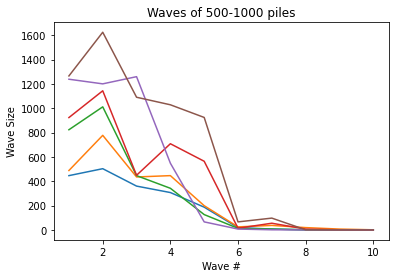

In [64]:
for j in range(len(sims)):
    sizes = sims[j]
    plt.plot(np.arange(1,len(sizes)+1), sizes)
plt.xlabel("Wave #")
plt.ylabel("Wave Size")
plt.title("Waves of 500-1000 piles")

<ipython-input-69-78bf17a98d45>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))
<ipython-input-69-78bf17a98d45>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))
<ipython-input-69-78bf17a98d45>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))
<ipython-input-69-78bf17a98d45>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))
<ipython-input-69-78bf17a98d45>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))


Text(0.5, 1.0, 'Waves of 500-1000 piles')

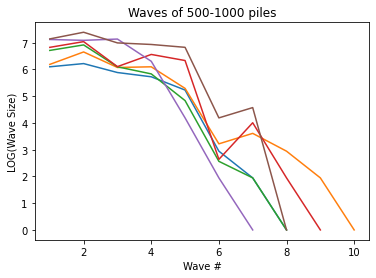

In [69]:
for j in range(len(sims)):
    sizes = sims[j]
    plt.plot(np.arange(1,len(sizes)+1), np.log(sizes))
plt.xlabel("Wave #")
plt.ylabel("LOG(Wave Size)")
plt.title("Waves of 500-1000 piles")

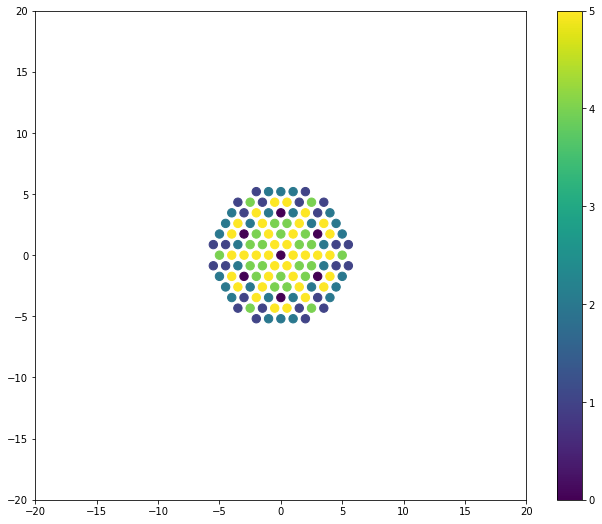

<Figure size 792x648 with 0 Axes>

In [72]:
pile = TriSandpile(max_sand=6)
pile.animate_drops(60, dotsize=70)


In [2]:
D = {(0,0): 4, (1,0): 3}
D.pop((0,0))
D

{(1, 0): 3}

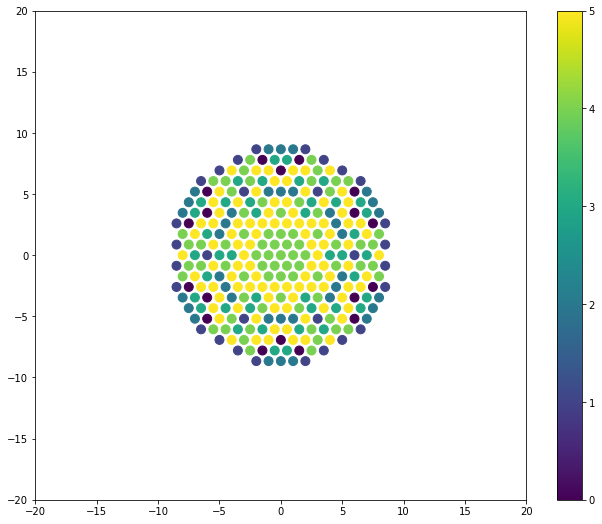

In [14]:
pile = TriSandpile(max_sand=6)
pile.set_sand(0, 0, 1000)
pile.run()
plt.figure(figsize=(11,9))
pile.show(80)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from IPython.display import display, clear_output
from math import floor, ceil
import random as rd
import pandas as pd
import math

def without(d, key):
    new_d = d.copy()
    new_d.pop(key)
    return new_d

class HexSandpile():
    def __init__(self, max_sand = 3, edge=(False, 0)):
        self.max_grains = max_sand
        self.grid = {}
        self.edge = edge

    def topple(self, key, edge):
        x, w = key
        p = self.grid[key]
        b = p // self.max_grains
        o = p % self.max_grains
        self.grid[key] = o

        # increase height of neighbor piles
        if (x+w)%3==0:
            try:      
                self.grid[(x+1, w)] += b
            except:
                self.grid[(x+1, w)] = b
            try:      
                self.grid[(x, w+1)] += b
            except:
                self.grid[(x, w+1)] = b
            try:      
                self.grid[(x-1, w-1)] += b
            except:
                self.grid[(x-1, w-1)] = b
            
        else:
            try:      
                self.grid[(x-1, w)] += b
            except:
                self.grid[(x-1, w)] = b
            try:      
                self.grid[(x, w-1)] += b
            except:
                self.grid[(x, w-1)] = b
            try:      
                self.grid[(x+1, w+1)] += b
            except:
                self.grid[(x+1, w+1)] = b

        if edge[0]:
            self.grid = {key1: self.grid[key1] for key1 in self.grid if (abs(key1[0])+abs(key1[1]))<edge[1]}


    def run(self):
        square_list = []
        while max(self.grid.values()) >= self.max_grains:
            for i in self.grid.items():
                if i[1] == max(self.grid.values()):
                    location = i[0]
                    break
            self.topple(location, self.edge)
            if not (location in square_list):
                square_list.append(location)
        square = len(square_list)
        bound_list = []
        for key in square_list:
            neighbor_count = 0
            for k in square_list:
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1) or (k[0] - key[0] == 1 and k[1] - key[1] == 1) or (k[0] - key[0] == -1 and k[1] - key[1] == -1):
                    neighbor_count += 1
            if neighbor_count < 3:
                bound_list.append(key)
        perimeter = len(bound_list)
        return square, perimeter

    def get_pile(self):
        return self.grid

    def set_sand(self, x, w, number):
        self.grid[(x,w)] = number
        
    def add_sand(self, x, y, number):
        self.grid[(x,y)] += number
        
    def __add__(self, other):
        result = Sandpile(rows = self.rows, cols = self.cols)
        try:
            result.grid = self.grid + other.grid
            return result.run()
        except ValueError:
            print("ValueError: sandpile grid sizes must match")

    def show(self, dotsize=50, minheight=0):
        xvalues = []
        yvalues = []
        heights = []
        for key in self.grid:
            if self.grid[key] >= minheight:
                r, w = key
                xvalues.append(r-w*np.cos(np.pi/3))
                yvalues.append(w*np.sin(np.pi/3))
                heights.append(self.grid[key]) 
        plt.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=self.max_grains-1, s=dotsize)
        plt.colorbar()   
        plt.xlim([-20,20])
        plt.ylim([-20,20])
        
    def animate_drops(self, drops, dotsize=50):
        import time
        fig = plt.figure(figsize=(11,9))
        for i in range(drops):
            self.set_sand(0, 0, 6)
            self.run()
            self.show(dotsize)
            time.sleep(.05)   
            clear_output(wait=True)
            display(fig)
            fig.clear()
            
    def animate_wave(self, show=True, dotsize=50):
        import time
        iterations = 0
        if show:
            fig = plt.figure(figsize=(11,9))
        if self.grid[(0,0)]>5:
            self.topple((0,0))
            iterations += 1
        else:
            return(0)
        center = self.grid[(0,0)]
        
        while max(without(self.grid, (0,0)).values()) >= self.max_grains:
            for i in without(self.grid, (0,0)).items():
                if i[1] == max(without(self.grid, (0,0)).values()):
                    location = i[0]
                    break
            self.topple(location)
            if show:
                self.show(dotsize)
    #             time.sleep(.05)   
                clear_output(wait=True)
                display(fig)
                fig.clear()
            iterations += 1
        return iterations
    
    def boundry(self, plot=True):
        # Find boundry points
        bound_list = []
        for key in self.grid:
            neighbor_count = 0
            for k in without(self.grid, key):
                if (k[0] == key[0] and abs(k[1] - key[1]) == 1) or (k[1] == key[1] and abs(k[0] - key[0]) == 1) or (k[0] - key[0] == 1 and k[1] - key[1] == 1) or (k[0] - key[0] == -1 and k[1] - key[1] == -1):
                    neighbor_count += 1
            if neighbor_count < 6:
                bound_list.append(key)
        
        if plot:
            # Plot points
            x = [bound_list[i][0]-bound_list[i][1]*np.cos(np.pi/3) for i in range(len(bound_list))]
            y = [bound_list[j][1]*np.sin(np.pi/3) for j in range(len(bound_list))]
            plt.scatter(x, y, s=2, c='red', marker='s')


            # Sort in order
            angle_list = []
            for point in bound_list:
                x, y = point[0]-point[1]*np.cos(np.pi/3), point[1]*np.sin(np.pi/3)
                if x >= 0:
                    try:
                        angle_list.append(math.atan(y/x))
                    except:
                        if y>0:
                            angle_list.append(np.pi/2)
                        else:
                            angle_list.append(-np.pi/2)
                else:
                    angle_list.append(math.atan(y/x) + np.pi)
            bound_arr = np.array([(bound_list[i][0]-bound_list[i][1]*np.cos(np.pi/3),bound_list[i][1]*np.sin(np.pi/3)) for i in range(len(bound_list))])
            angle_arr = np.array(angle_list)
            inds = angle_arr.argsort()
            sorted_bound = bound_arr[inds]

            # Plot line
            x = [sorted_bound[i][0] for i in range(len(sorted_bound))]
            y = [sorted_bound[j][1] for j in range(len(sorted_bound))]
            plt.plot(x, y, c='red')
            plt.plot([x[-1], x[0]], [y[-1], y[0]], c='red')
            
        return bound_list
    
    def get_ratios(self):
        counts = [0, 0, 0, 0, 0, 0]
        for v in self.grid.values():
            counts[v] += 1
        return np.array(counts)/len(self.grid)
    
    def get_density(self):
        vals = self.grid.values()
        return sum(vals)/len(vals)
    
    def get_boundry_density(self):
        locs = self.boundry(plot=False)
        vals = [self.grid[i] for i in locs]
        return sum(vals)/len(vals)

In [33]:
df = pd.DataFrame(columns=["Sand Amount", "Square", "Perimeter"])

In [34]:
# loop through all possible states
pile = HexSandpile()
pile.set_sand(0, 0, 0)
for i in range(1, 10000):
    pile.add_sand(0, 0, 1)
    s, p = pile.run()
    df.loc[len(df.index)] = [i, s, p]

KeyboardInterrupt: 

In [37]:
df.to_csv('1-2918_HexGrid_SP_2')

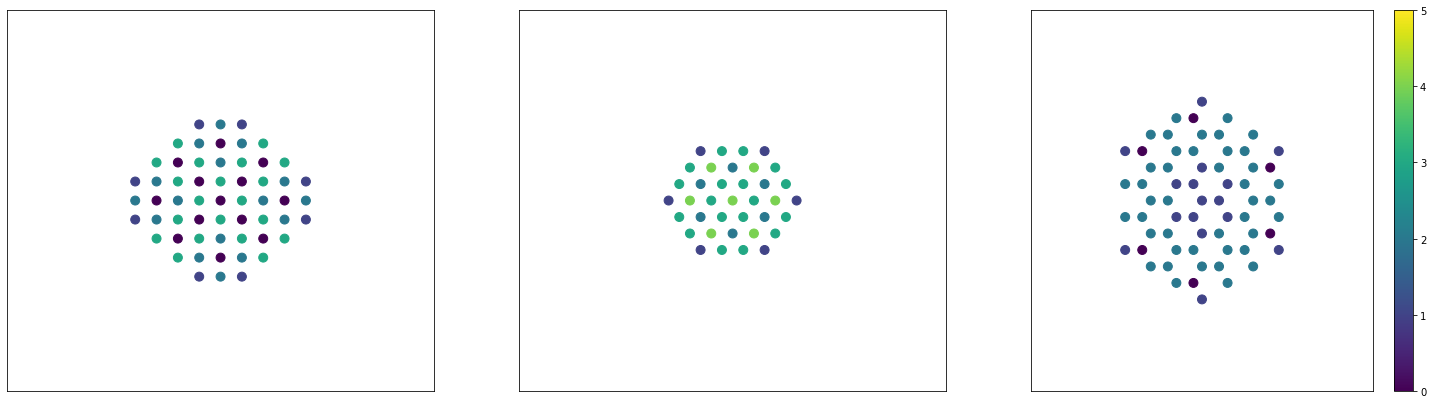

In [98]:
squ = Sandpile()
tri = TriSandpile()
hex = HexSandpile()
squ.set_sand(0,0,100)
tri.set_sand(0,0,100)
hex.set_sand(0,0,100)
piles = [squ,tri,hex]
for pile in piles:
    pile.run()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(26,7))

xvalues = []
yvalues = []
heights = []
grid=squ.get_pile()
for key in grid:
    x, y = key
    xvalues.append(x)
    yvalues.append(y)
    heights.append(grid[key]) 
scat1 = ax1.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=5, s=80)
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
    
xvalues = []
yvalues = []
heights = []
grid=tri.get_pile()
for key in grid:
    r, w = key
    xvalues.append(r-w*np.cos(np.pi/3))
    yvalues.append(w*np.sin(np.pi/3))
    heights.append(grid[key]) 
scat2 = ax2.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=5, s=80)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.colorbar(scat2)

xvalues = []
yvalues = []
heights = []
grid=hex.get_pile()
for key in grid:
    r, w = key
    xvalues.append(r-w*np.cos(np.pi/3))
    yvalues.append(w*np.sin(np.pi/3))
    heights.append(grid[key]) 
scat3 = ax3.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=5, s=80)
ax3.set_xlim([-10,10])
ax3.set_ylim([-10,10])

ax1.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
ax3.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
fig.show()

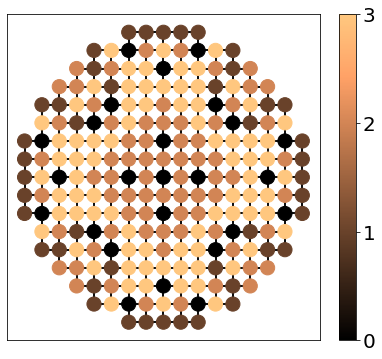

In [141]:
squ = Sandpile()
squ.set_sand(0,0,428)
squ.run()
fig = plt.figure(figsize=(7,6))
xvalues = []
yvalues = []
heights = []
grid=squ.get_pile()
for key in grid:
    x, y = key
    xvalues.append(x)
    yvalues.append(y)
    heights.append(grid[key])
    for other in grid:
        x2, y2 = other
        if (y == y2 and abs(x - x2) == 1) or (x == x2 and abs(y - y2) == 1):
            plt.plot([x,x2],[y,y2],c='black')
scat = plt.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=3, s=200, cmap='copper',zorder=10)
plt.xlim([-9,9])
plt.ylim([-9,9])
cbar = fig.colorbar(scat, ticks=[0, 1, 2, 3])
cbar.ax.tick_params(labelsize=20)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()
fig.savefig('squ_sand.png')

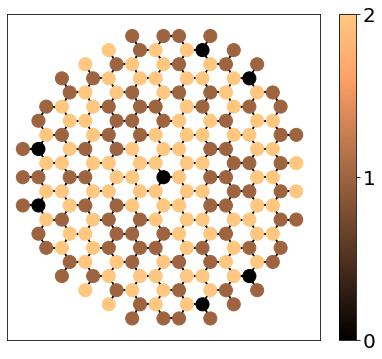

In [163]:
hex = HexSandpile()
hex.set_sand(0,0,300)
hex.run()
fig = plt.figure(figsize=(7,6))
xvalues = []
yvalues = []
heights = []
grid=hex.get_pile()
for key in grid:
    r, w = key
    xvalues.append(r-w*np.cos(np.pi/3))
    yvalues.append(w*np.sin(np.pi/3))
    heights.append(grid[key])
    for other in grid:
        r2, w2 = other
        if (w == w2 and abs(r - r2) == 1) or (r == r2 and abs(w - w2) == 1) or (r - r2 == 1 and w - w2 == 1) or (r - r2 == -1 and w - w2 == -1):
            plt.plot([r-w*np.cos(np.pi/3),r2-w2*np.cos(np.pi/3)],[w*np.sin(np.pi/3),w2*np.sin(np.pi/3)],c='black')
scat = plt.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=2, s=170, cmap='copper',zorder=10)
plt.xlim([-10,10])
plt.ylim([-10,10])
cbar = fig.colorbar(scat, ticks=[0, 1, 2])
cbar.ax.tick_params(labelsize=20)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()
fig.savefig('hex_sand.png')

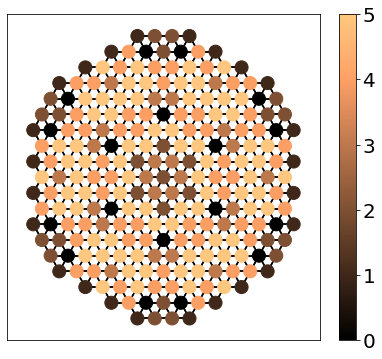

In [165]:
tri = TriSandpile()
tri.set_sand(0,0,800)
tri.run()
fig = plt.figure(figsize=(7,6))
xvalues = []
yvalues = []
heights = []
grid=tri.get_pile()
for key in grid:
    r, w = key
    xvalues.append(r-w*np.cos(np.pi/3))
    yvalues.append(w*np.sin(np.pi/3))
    heights.append(grid[key])
    for other in grid:
        r2, w2 = other
        if (w == w2 and abs(r - r2) == 1) or (r == r2 and abs(w - w2) == 1) or (r - r2 == 1 and w - w2 == 1) or (r - r2 == -1 and w - w2 == -1):
            plt.plot([r-w*np.cos(np.pi/3),r2-w2*np.cos(np.pi/3)],[w*np.sin(np.pi/3),w2*np.sin(np.pi/3)],c='black')
scat = plt.scatter(xvalues, yvalues, c=heights, vmin=0, vmax=5, s=170, cmap='copper',zorder=10)
plt.xlim([-9,9])
plt.ylim([-9,9])
cbar = fig.colorbar(scat, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.tick_params(labelsize=20)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.show()
fig.savefig('tri_sand.png')